<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Nearest Neighbour**
*From scratch using Python*

KNN algorithm is one of the classic supervised machine learning algorithms that is capable of both binary and multi-class classification.

Non-parametric by nature, KNN can also be used as a regression algorithm.

### Importing necessary libraries:
Numpy, pandas and matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Using Google Drive Mount to access dataset files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data Frame

The famous library 'pandas' is used to load the data frame from the csv files provided.

Data Frame for training dataset.

In [ ]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
df_train.head()

,0,1,...,783,784
0,23,0,...,0,0
1,7,0,...,0,0
2,16,0,...,0,0
3,15,0,...,0,0
4,23,0,...,0,0


Data Frame for testing dataset.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
df_test.head()

,0,1,...,783,784
0,1,0,...,0,0
1,1,0,...,0,0
2,1,0,...,0,0
3,1,0,...,0,0
4,1,0,...,0,0


An array of alphabets with 'A' at index 0 and 'Z' at index 25 to better understand which alphabet is being shown and predicted.

In [ ]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

## Visualising the data
We'll map the pixel brightness with the help of matplotlib and create the image of the alphabets on a graph.

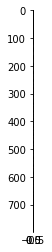

In [ ]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy()
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

## Converting the Data Frame to NumPy Arrays

Using the function `.to_numpy()` to conver the Data Frame to numpy array and then slicing the array to separate features from the label.

`X_train` --> Array with all features of training dataset.

`Y_train` --> Array with all labels of training dataset.

`X_test` --> Array with all features of testing dataset.

`Y_test` --> Array with all labels of testing dataset.

In [ ]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]

In [ ]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]

Defining a function `plot` which will be used to map the brightness of the pixels onto a graph thus showing the alphabet.

In [ ]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

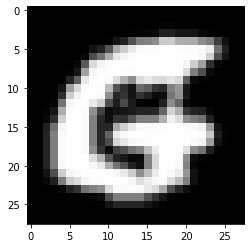

This is G


In [ ]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

## Normalising the Data:
The maximum pixel brightness is 255 and the minimum us 0. So we'll divide the whole array by 255 to get all the entries between 0 and 1.

In [ ]:
def normalise(X):
    result = X/255
    return result

## Distance Function:
To compute the distance between the test example and the training dataset, euclidean distance concept will be used.

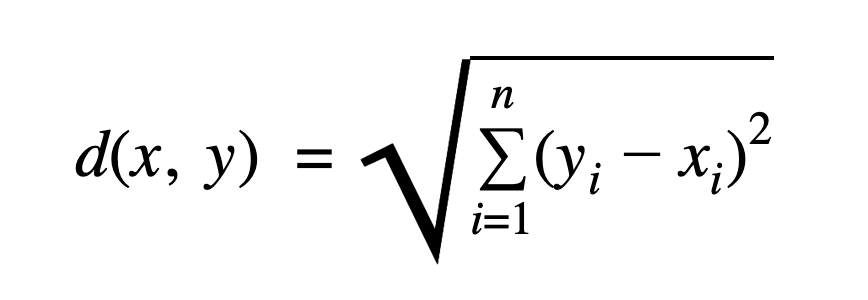

In [ ]:
def euclidean_distance(train_X, test_X):
    a = np.square(train_X - test_X)
    a = np.sum(a, axis=1)
    a = np.sqrt(a)
    return a

The model will compare the nearest 'k' neighbours and choose the class to which most of the neighbours belong.

The outcome will depend on the ordering of the classes in the case when the frequency of two classes is same.

In [ ]:
k = 5
prediction = np.empty((X_test.shape[0], 1))
for i in range(X_test.shape[0]):
    l = X_test[i, :].reshape((1, -1))
    distance = euclidean_distance(normalise(X_train), normalise(l))
    neighbours = distance.argsort()
    knn = Y_train[neighbours[:k]]
    frequency = np.unique(knn, return_counts=True)
    target_class = frequency[0][frequency[1].argmax()]
    print(i)
    prediction[i][0] = target_class

In [ ]:
print(prediction)

[[ 1.]
 [ 1.]
 [ 1.]
 ...
 [19.]
 [19.]
 [19.]]


## Accuracy of the Model:

In [ ]:
score = 0
for i in range(X_test.shape[0]):
    if prediction[i][0]==Y_test[i][0]:
        score+=1
    
print('Number of test cases predicted correctly:', score, 'out of', X_test.shape[0])
print('The testing accuracy of the model is',(score/X_test.shape[0])*100,'%')

Number of test cases predicted correctly: 12474 out of 14800
The testing accuracy of the model is 84.28378378378379 %


## Comparison with sklearn's KNN Model:

The comparison will be done on the basis of accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
pred_sk = neigh.predict(X_test).reshape((-1,1))
score_sk = 0
for i in range(X_test.shape[0]):
    if pred_sk[i][0]==Y_test[i][0]:
        score_sk+=1
    
print('Number of test cases predicted correctly:', score_sk, 'out of', X_test.shape[0])
print('The testing accuracy using sklearn is',(score_sk/X_test.shape[0])*100,'%')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Number of test cases predicted correctly: 12474 out of 14800
The testing accuracy using sklearn is 84.28378378378379 %
